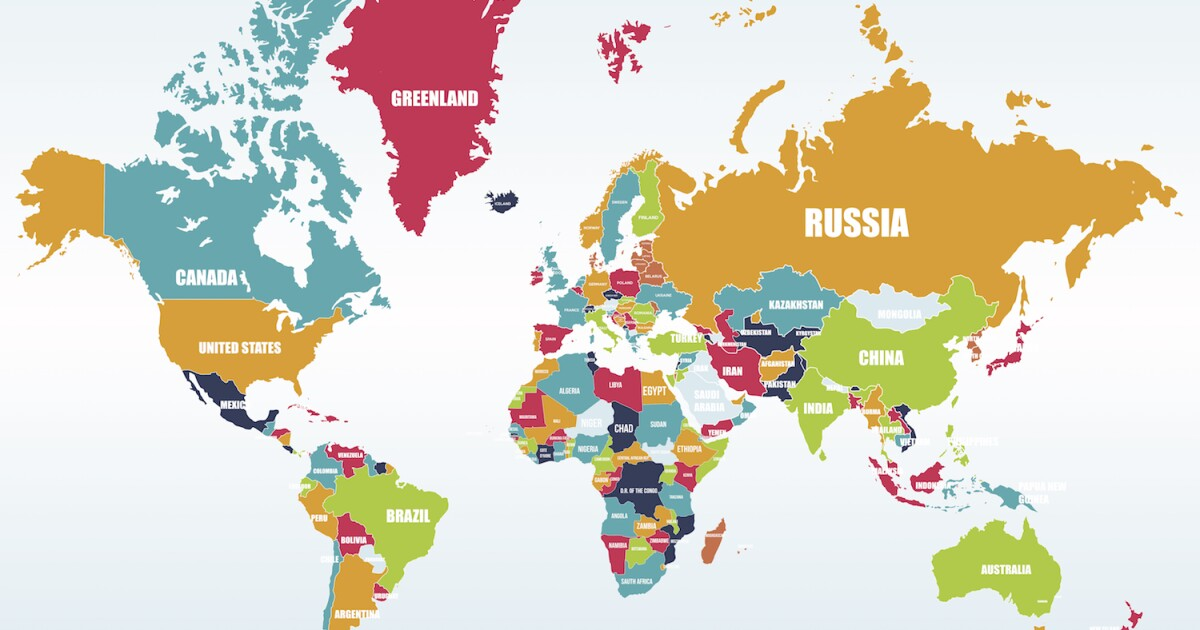

### __Objective :__
In this project, we are going to devide countries to two categories __( poor & rich )__ to just help to the poor countries which need<br> help for their health, economic and etc, it is done by some important Institutes
### __Problem :__
the dataset is so small and it may have some unusual data and outliers, it is only a training dataset

# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">| Guide |</p>

* [1 | Import Libraries](#import)
* [2 | Read Dataset](#read)
* [3 | About Dataset](#about)
* [4 | Dataset Overview](#overview)
    - [4.1 | Dataset Basic Information](#basic_information)
    - [4.2 | Dataset Description](#description) 
    - [4.3 | Feature Pre-Analysis](#fe_pre_analysis)
    - [4.4 | Feature Segmentation](#fe_segmentation)
    - [4.5 | Feature Pre-Correlation](#fe_pre_correlation)
* [5 | Data Cleansing](#data_cleansing)
    - [5.1 | Outlier Detection](#outlier_detection)
    - [5.2 | Missing Value Detection](#msv_detection) 
    - [5.3 | Duplicated Row](#duplicated_row)
    - [5.4 | Outlier Threatment](#outlier_threatment)
* [6 | Feature Analysis](#fe_analysis)
    - [6.1 | Continuous Feature Analysis](#cont_fe_analysis)
    - [6.2 | Feature Correlation](#fe_correlation)
    - [6.3 | Feature Importance](#fe_importance)
* [7 | Data Exploration](#exploration)
    - [7.1 | 3D Scatter Plot](#scatter_3d)
    - [7.2 | 2D Regression Plot](#regression_2d)
    
* [8 | Feature Scaling](#scaling)
* [9 | PCA](#PCA)
    - [9.1 | Clustering Status](#cluster_status)
* [10 | Clustering](#clustering)
    - [10.1 | Important Clustering Self-made Functions](#imp_cluster_function)
    - [10.2 | Kmeans](#kmeans) 
    - [10.3 | Gaussian Mixture Model (GMM)](#GMM)
    - [10.4 | MiniBatchKmeans](#minibatch)
    - [10.5 | SpectralClustering](#spectral)
    - [10.6 | Agglomerative](#agglomerative)
* [11 | Algorithm Comparison](#algo_comaprison)

<a id = "import" ></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">1 | Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings


from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

from itertools import product

In [2]:
warnings.filterwarnings("ignore")

<a id = "read" ></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">2 | Read Dataset</p>

In [3]:
df1 = pd.read_csv("Country-data.csv")

In [4]:
df1

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   Gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

__There are 167 rows and 10 columns__

<a id = "about"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">3 | About Dataset</p>

<table width = 100%>
  <thead>
    <tr >
      <th style = "text-align : left;">Item</th>
      <th style = "text-align : left;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style = "text-align : left;">Country</td>
      <td style = "text-align : left;">The name of the country being discussed</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Child Mortality Rate</td>
      <td style = "text-align : left;">The number of children under the age of 5 who die per 1,000 live births</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Exports (per capita)</td>
      <td style = "text-align : left;">The goods and services a country produces and sells to other countries</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Imports (per capita)</td>
      <td style = "text-align : left;">The goods and services a country purchases from other countries</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Health (per capita)</td>
      <td style = "text-align : left;">The overall well-being of a country's citizens</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Income</td>
      <td style = "text-align : left;">The money earned by individuals or households in a country</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Inflation</td>
      <td style = "text-align : left;">The rate at which the general level of prices for goods and services is rising</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Life Expectancy</td>
      <td style = "text-align : left;">The average number of years a person is expected to live at birth</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Total Fertility Rate</td>
      <td style = "text-align : left;">The average number of children a woman is expected to have over her lifetime</td>
    </tr>
    <tr>
      <td style = "text-align : left;">Gross Domestic Product (GDP) (per capita)</td>
      <td style = "text-align : left;">A measure of a country's economic output</td>
    </tr>
  </tbody>
</table>


__The above table shows the column descriptions__

<a id = "overview"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">4 | Dataset Overview</p>

<a id = "basic_information"> </a>
## 4.1 | Dataset Basic Information

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   Gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


+ There is no missing data

<a id = "description"> </a>
## 4.2 | Dataset Description :

In [6]:
df1.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           Gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

+ The features are almost normal, but they should be checked carefully later

<a id = "fe_pre_analysis"> </a>

## 4.3 | Feature Pre-Analysis

In [7]:
def set_freq_label(ax, fmt = "%g", padding = 0, digitSize = 10) :
    for cont in ax.containers :
        ax.bar_label(cont, fmt = fmt, padding = padding, size = digitSize)

In [8]:
fig = go.Figure(data=[go.Pie(labels=df1.nunique().sort_values().keys(),
                             values=df1.nunique().sort_values().values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=12)
fig.show()

+ The country feature is categorical nominal and it acts as an identifier because it shows that <br>each row of dataset is related to a specific country, so it should be removed when clustering
+ There are 167 countries in this dataset to analyze
+ There are almost quite a few non-unique value in all the features
+ All the features expect __the country feature__ is continuous because they refer to the mean of sth



<a id = "fe_segmentation"> </a>

## 4.4 | Feature Segmentation

__Continuous varibales :__

In [9]:
cont_vars = df1.drop(["country"], axis = 1).columns

In [10]:
cont_vars

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'Gdpp'],
      dtype='object')

In [11]:
len(cont_vars)

9

__Categorical variables :__

In [12]:
catg_vars = df1.drop(cont_vars, axis = 1).columns

In [13]:
catg_vars

Index(['country'], dtype='object')

In [14]:
len(catg_vars)

1

<a id = "fe_pre_correlation"> </a>
## 4.5 | Feature Pre-Correlation

__Features Vs Features ( Scatterplot ) :__

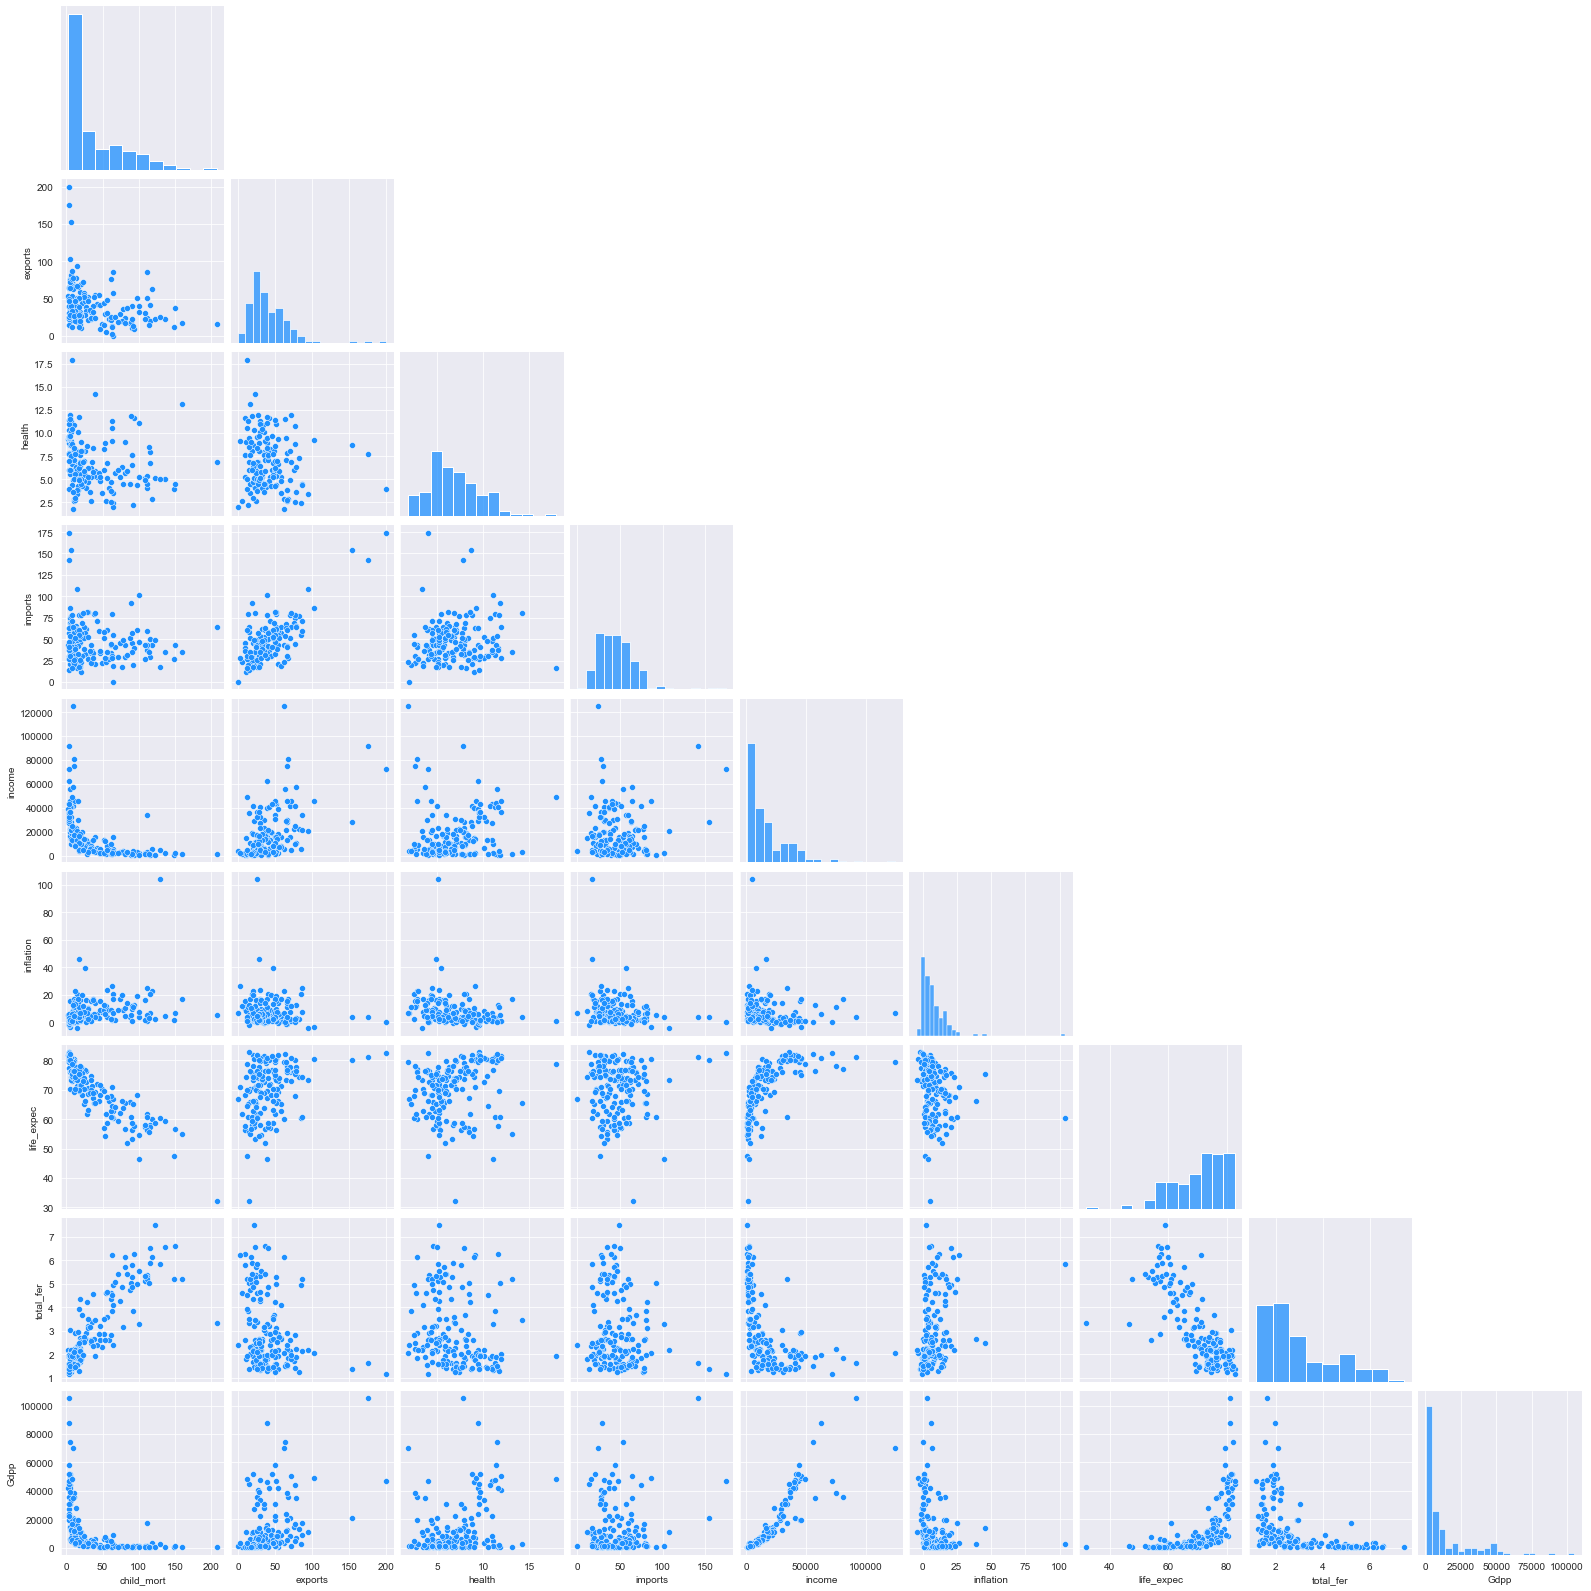

In [15]:
sns.set_style("darkgrid")
sns.pairplot(df1[cont_vars],corner = True, plot_kws = {"color" : "dodgerblue"}, diag_kws = {"color" : "dodgerblue"})
plt.show()

There are __both exponential / linear relationship__ between features, so we should use __Spearman__ mehtod for corraltion because : 
   *  the Spearman correlation coefficient can capture __nonlinear relationships between variables, including exponential relationships__
   * for those linear relation ones we should use __pearson correlation__
   * the __majority is exponential__, then we use __Spearman__ until the end of the data cleaning step


<a id = "data_cleansing"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">5 | Data Cleansing</p>

<a id = "outlier_detection"></a>
## 5.1 | Outlier Detection

__There is a point :__
   * we have a very small dataset, so having unusual outliers is normal which they might be valid
   * this is just a __training dataset__

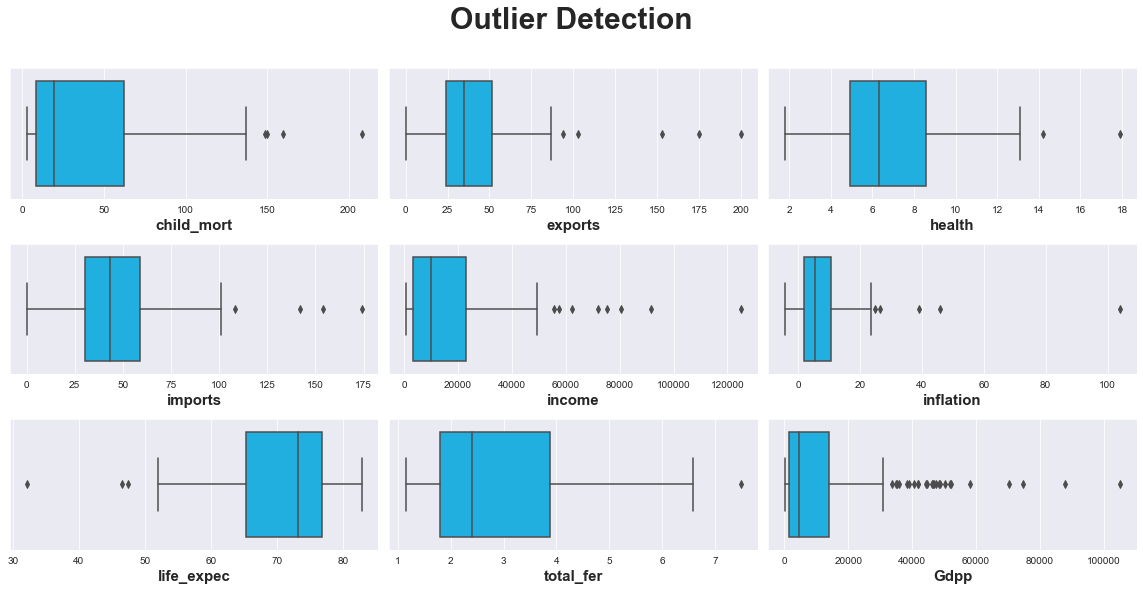

In [16]:
plt.figure(figsize = (16,8))
for idx, col in enumerate(cont_vars):
    plt.subplot(3,3, idx + 1)
    sns.boxplot(x = col, data = df1, color = "deepskyblue")
    plt.xlabel(col, size = 15, fontweight = "bold")

plt.suptitle("Outlier Detection", size = 30, fontweight = "bold", y = 1.02)
plt.tight_layout()
plt.show()

+ The outliers look valid but they should be __checked later__
+ There is a __significant outlier__ in the inflation feature

### inflation feature

In [17]:
df1[df1.inflation > 80]

country  child_mort  exports  health  imports  income  inflation  \
113  Nigeria       130.0     25.3    5.07     17.4    5150      104.0   

     life_expec  total_fer  Gdpp  
113        60.5       5.84  2330

__Point :__
   + Although, this outlier is valid but as a result of its long distance of the main disturbution, <br>it may cause a problem in clustering, __so__ it should be removed
   

__The inflation's outlier status :__

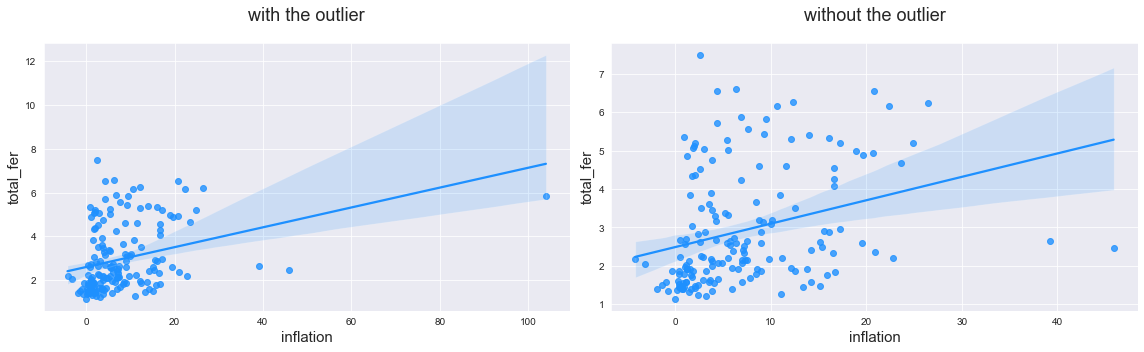

In [18]:
plt.figure(figsize = (16,5))
plt.subplot(121)
sns.regplot(x = "inflation", y = "total_fer", data = df1, color = "dodgerblue")
plt.ylabel("total_fer", size = 15)
plt.xlabel("inflation", size = 15)
plt.title("with the outlier", size = 18,y = 1.06)
plt.subplot(122)
sns.regplot(x = "inflation", y = "total_fer", data = df1[df1.inflation < 80], color = "dodgerblue")
plt.ylabel("total_fer", size = 15)
plt.xlabel("inflation", size = 15)
plt.title("without the outlier", size = 18, y = 1.06)
plt.tight_layout()
plt.show()

+ when removing the outlier the regression line's angle is changed, which is not good, so the outlier should be removed

<a id = "msv_detection"></a>
## 5.2 | Missing Value Detection

<AxesSubplot:>

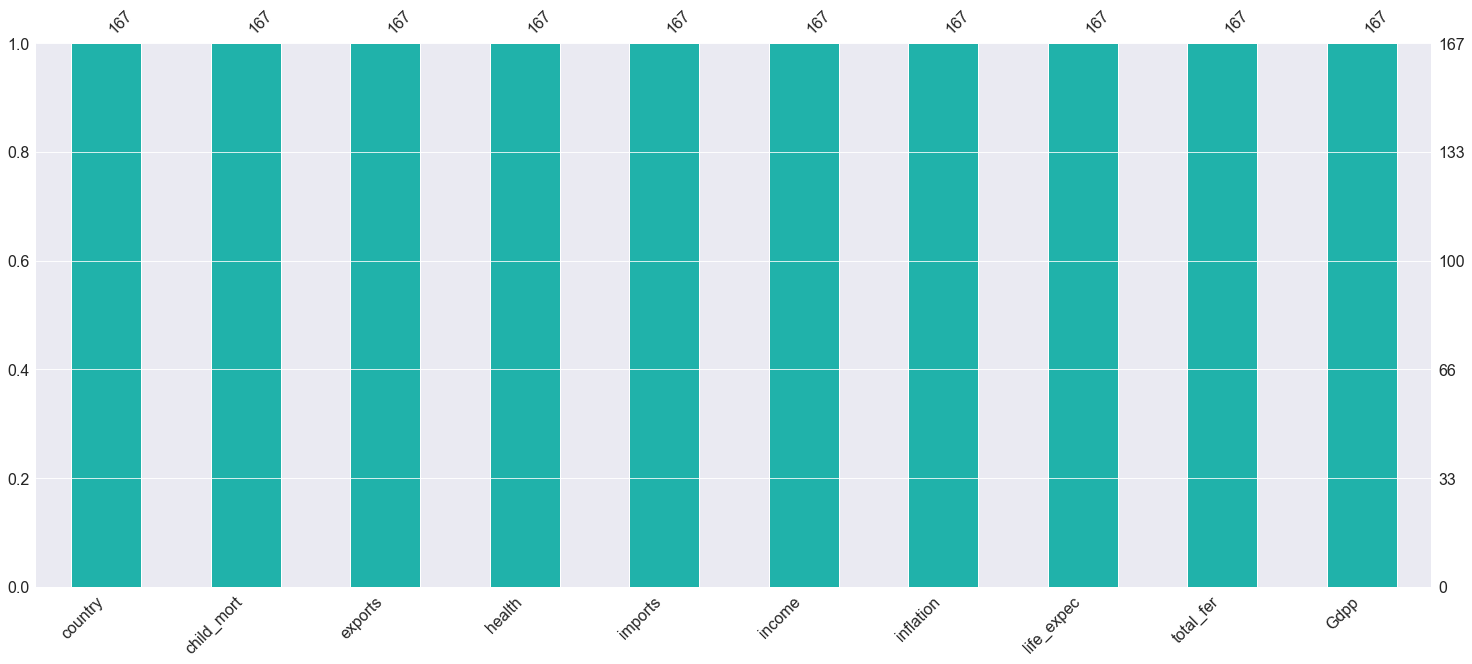

In [19]:
msno.bar(df1,color = "lightseagreen" )

__There is no missing value in this dataset__

<a id = "duplicated_row"></a>
## 5.3 | Duplicated Row

In [20]:
df1[df1.duplicated()]

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, Gdpp]
Index: []

__There is no duplicated row in this dataset__

<a id = "outlier_threatment"></a>
## 5.4 | Outlier Threatment

__There is a important point :__
   + Although the outliers in this dataset are valid but they look significant and <br> they may affect badly on PCA and clustering, therefore, we need to use techniques <br>to get the outliers correctly so as not to lose too much information
   + by trial and error, i found that the __Z-score method__ can __work better than other in this dataset__

### Z score :

In [21]:
outliers_list = []
for col in cont_vars :
    z_scores = np.abs(stats.zscore(df1[col]))
    outliers = np.where(z_scores > 3)[0]
    outliers_list.extend(outliers)

In [22]:
df1.loc[outliers_list]

country  child_mort  exports  health  imports  income  inflation  \
66           Haiti       208.0     15.3    6.91     64.7    1500      5.450   
132   Sierra Leone       160.0     16.8   13.10     34.5    1220     17.200   
91      Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98           Malta         6.8    153.0    8.65    154.0   28300      3.830   
133      Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
159  United States         7.3     12.4   17.90     15.8   49400      1.220   
91      Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98           Malta         6.8    153.0    8.65    154.0   28300      3.830   
133      Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
23          Brunei        10.5     67.4    2.84     28.0   80600     16.700   
82          Kuwait        10.8     66.7    2.63     30.4   75200     11.200   
91      Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
123          Qatar         9.0     62.3    1.81     23.8  125000      6.980   
113        Nigeria       130.0     25.3    5.07     17.4    5150    104.000   
163      Venezuela        17.1     28.5    4.91     17.6   16500     45.900   
66           Haiti       208.0     15.3    6.91     64.7    1500      5.450   
112          Niger       123.0     22.2    5.16     49.1     814      2.550   
91      Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
114         Norway         3.2     39.7    9.48     28.5   62300      5.950   
123          Qatar         9.0     62.3    1.81     23.8  125000      6.980   
145    Switzerland         4.5     64.0   11.50     53.3   55500      0.317   

     life_expec  total_fer    Gdpp  
66         32.1       3.33     662  
132        55.0       5.20     399  
91         81.3       1.63  105000  
98         80.3       1.36   21100  
133        82.7       1.15   46600  
159        78.7       1.93   48400  
91         81.3       1.63  105000  
98         80.3       1.36   21100  
133        82.7       1.15   46600  
23         77.1       1.84   35300  
82         78.2       2.21   38500  
91         81.3       1.63  105000  
123        79.5       2.07   70300  
113        60.5       5.84    2330  
163        75.4       2.47   13500  
66         32.1       3.33     662  
112        58.8       7.49     348  
91         81.3       1.63  105000  
114        81.0       1.95   87800  
123        79.5       2.07   70300  
145        82.2       1.52   74600

__Length :__

In [23]:
len(outliers_list)

21

__Dropping :__

In [24]:
df1 = df1.drop(outliers_list).reset_index(drop = True)

<a id = "fe_analysis"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">6 | Feature Analysis</p>

<a id = "cont_fe_analysis"></a>

## 6.1 | Continuous Feature Analysis

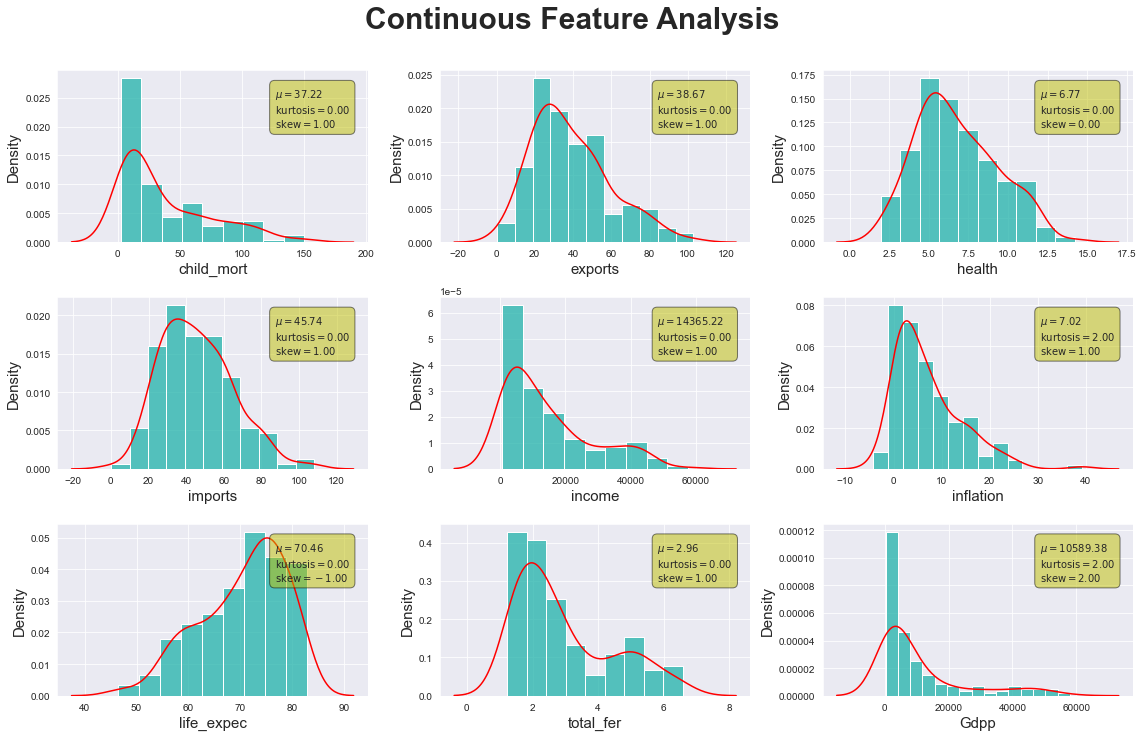

In [25]:
plt.figure(figsize = (16, 10))
for idx, col in enumerate(cont_vars):
    ax = plt.subplot(3,3, idx + 1)
    sns.histplot(x = col , data = df1, stat = "density", color = "lightseagreen")
    sns.kdeplot(x = col, data = df1, color = "r")
    plt.xlabel(col, size = 15,)
    plt.ylabel("Density", size = 15)
    textstr = '\n'.join((
    r'$\mu=%.2f$' %round(df1[col].mean(), 2),
    r'$\mathrm{kurtosis}=%.2f$'%round(df1[col].kurtosis()),
    r'$\mathrm{skew}=%.2f$' %round(df1[col].skew()),
    ))
    ax.text(0.7, 0.90, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='y', edgecolor='black', pad=0.5, alpha = 0.5))

plt.suptitle("Continuous Feature Analysis", size = 30, fontweight = "bold", y = 1.02)
plt.tight_layout()
plt.show()

+ There are almost both ( positive/negative ) skew / __almost__ normal disturbution in this dataset
+ By ignoring the outliers, it is obvious that the majority of disturbution is __normal__

<a id = "fe_correlation"></a>

## 6.2 | Feature Correlation

The reason why __spearman method__ is used here has been explained in __Dataset Overview step__

In [26]:
df_corr_spearman = df1[cont_vars].corr(method = "spearman")

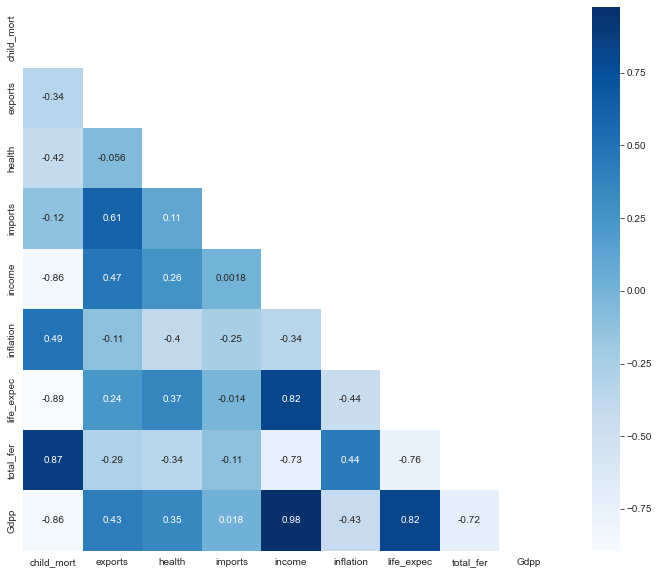

In [27]:
sns.set_style("white")
plt.figure(figsize = (12,10))
mask = np.triu(np.ones_like(df_corr_spearman, dtype = bool))
sns.heatmap(df_corr_spearman, mask = mask, annot = True, cmap = "Blues")
plt.show()

+ There is almost a great correlation between all the features<br>
specially between __(Gdpp, income) (Gdpp, life_expec) (total_fer, child_mort) (life_expec, income)__


<a id = "fe_importance"></a>

## 6.3 | Feature Importance

In [28]:
feature_importance = round(df_corr_spearman.abs().mean().sort_values(), 6)
feature_importance

imports       0.248743
health        0.367478
exports       0.392161
inflation     0.432726
total_fer     0.585376
life_expec    0.594926
income        0.606638
Gdpp          0.623094
child_mort    0.650495
dtype: float64

In [29]:
feature_importance.values

array([0.248743, 0.367478, 0.392161, 0.432726, 0.585376, 0.594926,
       0.606638, 0.623094, 0.650495])

__Feature Importance plot :__

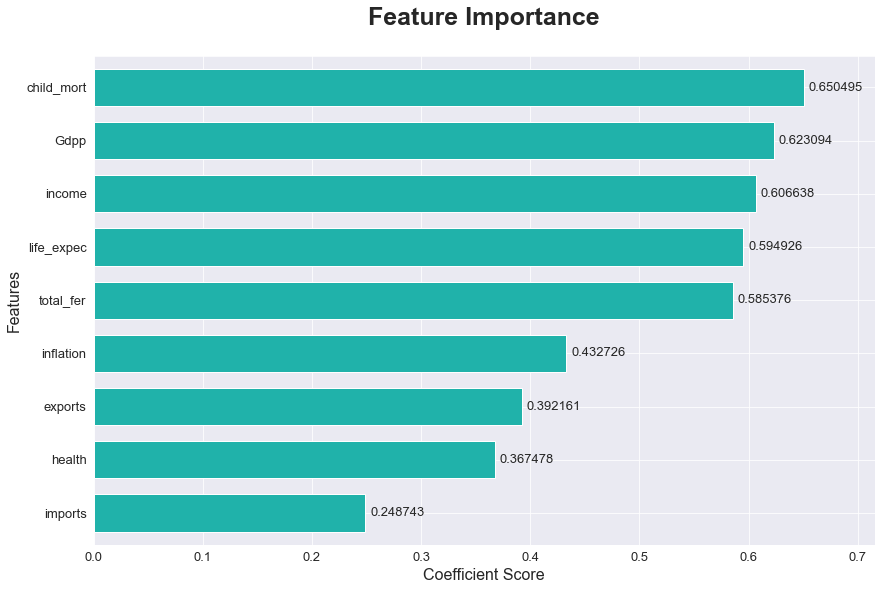

In [30]:
sns.set_style("dark")

ax = feature_importance.plot.barh(figsize = (14,9), width = 0.7, color = "lightseagreen")
set_freq_label(ax, padding = 5, digitSize = 13)
plt.margins((0.1))
plt.tick_params(labelsize = 13)
plt.ylabel("Features", size = 16)
plt.xlabel("Coefficient Score", size = 16)
plt.title("Feature Importance" , size = 25, fontweight = "bold", y = 1.05)

plt.grid()
plt.show()

__Correlation cofficinet shows that :__
   * the most __important__ feature is __child_mort__ and the least one is __imports__
   * we can identify the importancy of the other features by checking the above plot

<a id = "exploration"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">7 | Data Exploration</p>

<a id = "scatter_3d"></a>

## 7.1 | 3D Scatter Plot

In [31]:
fig = px.scatter_3d(x = "health", y = "exports", z = "income", data_frame = df1,
                    title = "How Exports & Health can affect the income of a country")
fig.show()

__The answer is that__ : <br>if exports and a counrty's health outcomes increases, it can result in __increasing a country's pure income__

In [32]:
fig = px.scatter_3d(x = "exports", y = "health", z = "Gdpp", data_frame = df1,
                    title = "How Exports & health can affect the Gdpp of a country")
fig.show()

__The answer is that__ : <br>if exports and a counrty's health outcomes increases, it can result in __increasing a country's economic output__

<a id = "regression_2d"></a>

## 7.2 | 2D Regression Plot

In [33]:
feature_2D_scatter = (("exports", "imports"), ("exports","income"),
                      ("inflation", "total_fer"), ("child_mort", "total_fer"))

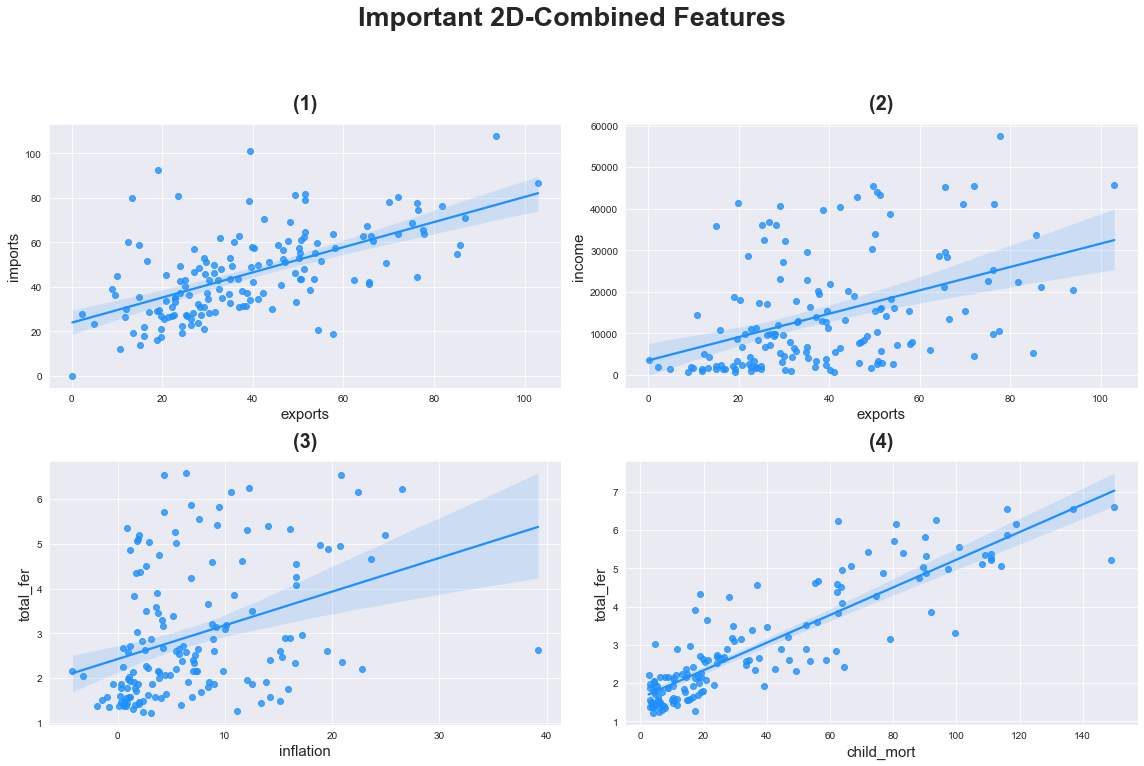

In [34]:
plt.figure(figsize = (16,10))
for idx, (col1, col2) in enumerate(feature_2D_scatter):
    plt.subplot(2,2, idx + 1)
    sns.regplot(x = col1, y = col2, data = df1, color = "dodgerblue")
    plt.xlabel(col1, size = 15)
    plt.ylabel(col2, size = 15)
    plt.title(f"({idx + 1})", size = 20, fontweight = "bold", y = 1.03)
    plt.grid()
plt.suptitle("Important 2D-Combined Features", size = 27, fontweight = "bold", y = 1.06)
plt.tight_layout()
plt.show()

### Analysis : 
+ __(1) :__
    - the plot shows that more exports results in more imports
+ __(2) :__
    - the plot shows that if exports increase, <br>it can have a positive effect on a country's income, leading to an increase in income
+ __(3) :__
    - the plot shows that if the inflation of a country increases, the economic situation of the country will be good and <br>the people can afford their  life's expense which it makes them persuaded to have more babies 
+ __(4) :__
    - the graph shows that if the number of deaths of children <br> under 5 years increases, the number of births also increases.
    


<a id = "scaling"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">8 | Feature Scaling</p>

In [35]:
scaler = StandardScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1[cont_vars]), columns = scaler.feature_names_in_)

In [36]:
df1_scaled

child_mort   exports    health   imports    income  inflation  \
0      1.461836 -1.413304  0.318094 -0.043800 -0.954569   0.348785   
1     -0.569112 -0.526002 -0.088760  0.150114 -0.331921  -0.365865   
2     -0.273852 -0.013338 -1.028868 -0.751321 -0.109654   1.310315   
3      2.256555  1.164802 -1.550273 -0.148618 -0.633516   2.219869   
4     -0.742957  0.336653 -0.294162  0.689927  0.354339  -0.806205   
..          ...       ...       ...       ...       ...        ...   
148   -0.025502 -0.343612 -0.381062 -0.903307 -0.757746   1.368064   
149   -0.221423  0.390877 -0.602264  0.364991 -0.854287  -0.635844   
150   -0.384230  1.642960  0.025791  1.806239 -0.739037   0.732820   
151    0.526386 -0.427413 -0.629915 -0.594094 -0.739785   2.393118   
152    1.265916 -0.082351 -0.349462 -0.777526 -0.829590   1.007130   

     life_expec  total_fer      Gdpp  
0     -1.738235   1.944385 -0.722055  
1      0.712299  -0.886986 -0.467590  
2      0.736682  -0.045044 -0.440971  
3     -1.262759   2.175240 -0.507878  
4      0.773257  -0.561073  0.115874  
..          ...        ...       ...  
148   -0.202080  -0.418486 -0.662557  
149   -0.909199   0.369138 -0.548167  
150    0.322164  -0.683290 -0.667593  
151   -0.360572   1.163551 -0.667593  
152   -2.250287   1.659211 -0.656802  

[153 rows x 9 columns]

<a id = "PCA" ></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">9 | PCA</p>

__Using the PCA technique :__

In [37]:
pca = PCA()
pc_names = [f"PC{i + 1}" for i in range(df1_scaled.shape[1])]
pca_df = pd.DataFrame(pca.fit_transform(df1_scaled), columns = pc_names)

In [38]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.130806 -0.471117  1.336274  0.641322  0.195569 -0.251398  0.361418   
1    0.551781 -0.230632 -0.071234 -1.377036  0.130326 -0.159119  0.131123   
2   -0.356257 -0.542354 -1.818159 -0.216783  0.366919 -0.406925 -0.271507   
3   -3.454323  1.114470 -1.553986  2.168457 -0.048581 -0.290777 -0.436558   
4    1.308957  0.612033 -0.065287 -0.687559 -0.431937 -0.380989  0.110448   
..        ...       ...       ...       ...       ...       ...       ...   
148 -1.018529 -0.731559 -1.161339 -0.476265  0.827645  0.490574 -0.100909   
149 -0.891335  0.907202  0.189163 -0.635586 -0.586198  0.256475 -0.082235   
150  0.331876  2.386196 -0.572829 -0.650777  1.155192  0.016022 -0.278325   
151 -2.233628 -0.522003 -1.400054  0.649399  1.214449 -0.502024 -0.111702   
152 -3.157697 -0.074206  0.000743  1.161282  0.017236  0.722630 -0.113101   

          PC8       PC9  
0    0.351771  0.131047  
1   -0.247053  0.090957  
2   -0.132311  0.033998  
3   -0.409879 -0.224961  
4    0.064714  0.128330  
..        ...       ...  
148 -0.174382 -0.257398  
149  0.709470 -0.344214  
150 -0.384095 -0.306973  
151  0.069152 -0.160382  
152  0.627696 -0.179638  

[153 rows x 9 columns]

### __Eigenvectors__

__The pca.component_ attribute :__
   + it is a numpy array that contains the principal components in decreasing order of importance. <br>Each row of the array corresponds to a principal component, and each column corresponds to <br> a feature in the original data. The values in each row indicate the weight or contribution of each <br>original feature to the corresponding principal component.


In [39]:
# loadings : eigenvectors
loadings = pd.DataFrame(
    pca.components_.T,  
    columns = pc_names, 
    index = df1_scaled.columns,
)

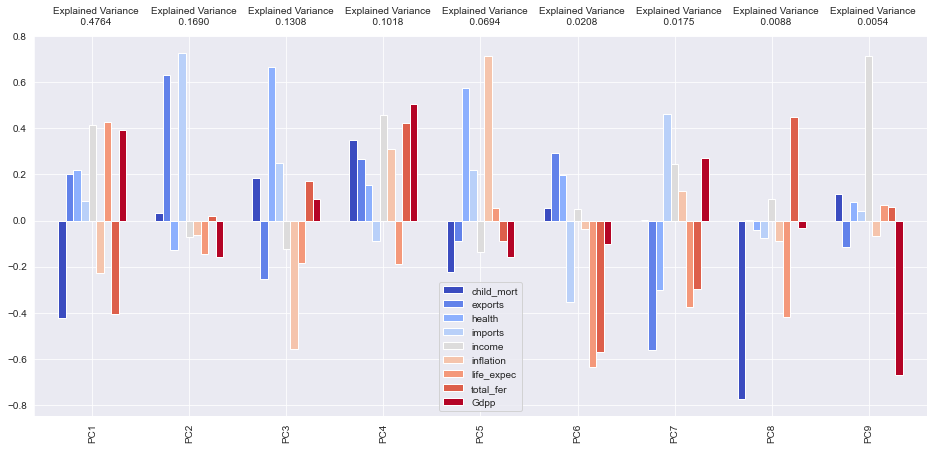

In [40]:
ax = loadings.T.plot.bar(figsize = (16, 7), width = 0.7, cmap = "coolwarm")
for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
plt.grid()
plt.show()

+ the above plot shows the relationship between the orginal features and the principal components
+ the PCs are ordered from the most important to the least one ( from left to right ) 

__Getting explained_variance_ratio (evr) and cumulative_sum_ratio (cvr) :__

In [41]:
evr = pca.explained_variance_ratio_
cvr = np.cumsum(evr)

__Plotting ( evr & cvr ) results :__

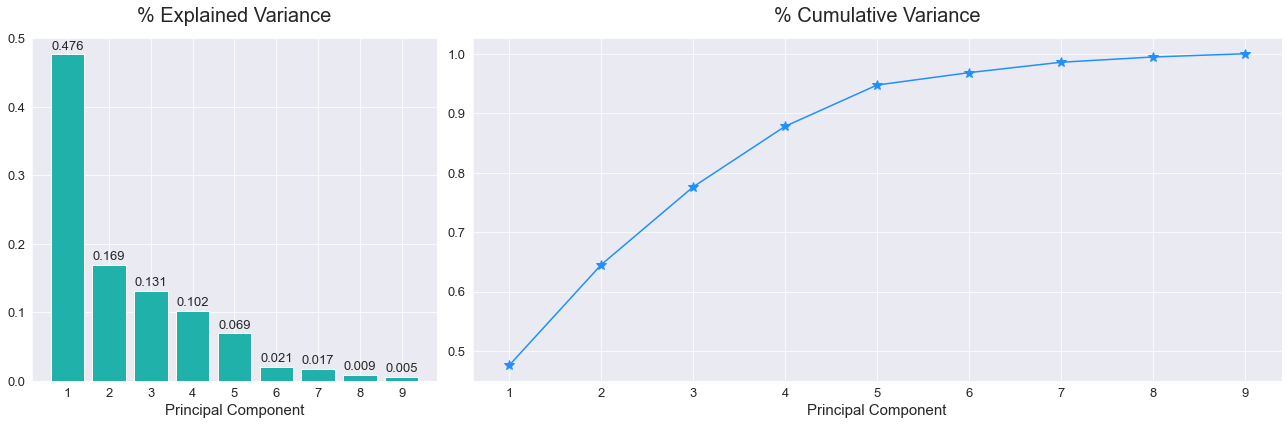

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (18,6), gridspec_kw = {"width_ratios" : [1,2]})

pc_numbers = np.arange(1, pca.n_components_ + 1)
ax[0].bar(pc_numbers, evr, color = "lightseagreen")
set_freq_label(ax[0], fmt = "%.3f", digitSize = 13, padding = 2)
ax[0].set_xticks(pc_numbers) 
ax[0].tick_params(labelsize = 13)
ax[0].set_title("% Explained Variance",fontsize=20, y = 1.03)
ax[0].set_xlabel ("Principal Component", size = 15)
ax[0].grid()

ax[1].plot(pc_numbers, cvr, "-*",color = "dodgerblue",markersize = 10)
ax[1].tick_params(labelsize = 13)
ax[1].set_title("% Cumulative Variance", fontsize=20, y = 1.03)
ax[1].set_xlabel ("Principal Component", size = 15)
ax[1].grid()

plt.tight_layout()
plt.show()

+ __% Cumulative Variance Ratio :__
   - it shows that with 5 principal components we have more than 90% of <br> the information than 9 principal components
+ __% Explained Variance Ratio:__
   -  it shows that the first PC has 46% of the information which is not enough, <br> so we should select more PCs.<br>
   from PC2 to PC5 , we have uniform changes,<br> and the sum of their variances with the PC1 is almost 94% so they are selected within the PC1
+ __Finally :__
    - 5 principal components ( from PC1 to PC5 ) are selected
    

__Building a new dataframe with these 5 new features :__

In [43]:
pca_new = PCA(n_components = 5)
pca_df_new = pd.DataFrame(pca_new.fit_transform(df1_scaled), columns = pc_names[:5])

In [44]:
df2_pca = pca_df_new.copy()

In [45]:
df2_pca

PC1       PC2       PC3       PC4       PC5
0   -3.130806 -0.471117  1.336274  0.641322  0.195569
1    0.551781 -0.230632 -0.071234 -1.377036  0.130326
2   -0.356257 -0.542354 -1.818159 -0.216783  0.366919
3   -3.454323  1.114470 -1.553986  2.168457 -0.048581
4    1.308957  0.612033 -0.065287 -0.687559 -0.431937
..        ...       ...       ...       ...       ...
148 -1.018529 -0.731559 -1.161339 -0.476265  0.827645
149 -0.891335  0.907202  0.189163 -0.635586 -0.586198
150  0.331876  2.386196 -0.572829 -0.650777  1.155192
151 -2.233628 -0.522003 -1.400054  0.649399  1.214449
152 -3.157697 -0.074206  0.000743  1.161282  0.017236

[153 rows x 5 columns]

<a id = "cluster_status"></a>
## 9.1 | Clustering Status

In [46]:
df2_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')

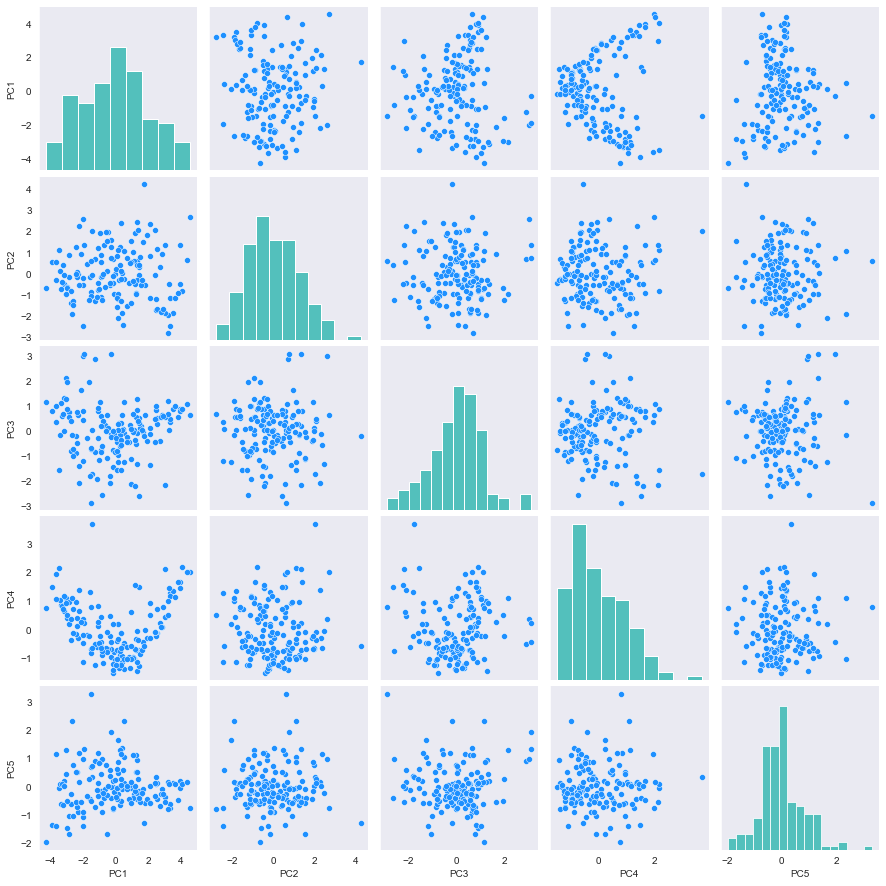

In [47]:
sns.pairplot(df2_pca, plot_kws = {"color" : "dodgerblue"}, diag_kws = {"color" : "lightseagreen"})
plt.show()

__The reasons :__
   + This is a small dataset which is low-dimensional
   + There are outliers in the plots
   + There are varying densities means that the PCs have different shapes of data <br> 
   __such as ( spherical, dense, disturbution ) shapes__
   
__As a result of the above reasons, I'll use these clustering algorithms :__ 
   + Standard-Kmeans
   + Gaussian Mixture Model (GMM)
   + Agglomerative 
   + MiniBatchKmeans
   + Spectral

<a id = "clustering"></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">10 | Clustering</p>

<a id = "imp_cluster_function"></a>
## 10.1 | Important Clustering Self-made Functions

In [48]:
def cluster_status(df_cluster):
    
    plt.figure(figsize = (14, 10))
    
    plt.subplot(221)
    max_value = df_cluster.groupby("cluster")["sillhouette_score"].max().sort_values(ascending = False)
    ax = max_value.plot.bar(color = "lightseagreen")
    set_freq_label(ax, digitSize = 12, fmt = "%0.3f", padding = 3)
    plt.grid()
    plt.margins((0.1))
    plt.ylabel("Sillhouette_score", size = 15)
    plt.xlabel("Cluster", size = 15)


    plt.subplot(222)
    max_value = df_cluster.groupby("cluster")["calinski_harabasz_score"].max().sort_values(ascending = False)
    ax = max_value.plot.bar(color = "lightseagreen")
    set_freq_label(ax, digitSize = 12, fmt = "%0.3f", padding = 3)
    plt.grid()
    plt.margins((0.1))
    plt.ylabel("Calinski_harabasz_score", size = 15)
    plt.xlabel("Cluster", size = 15)
    

    plt.suptitle("N-Cluster Status", size = 28, fontweight = "bold", y = 1.01)
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------------------------------------------------------
def pca_cluster_result(algo_name, df_pca, labels,centroids = None, centers = True):
    
    plt.figure(figsize = (8, 6))
    plt.scatter("PC1", "PC2", data = df_pca, c = labels, cmap = "winter")
    if centers :
        plt.plot(centroids[:, 0], centroids[:, 1], "o" ,color = "r", markersize = 10)
    plt.grid()
    plt.xlabel("PC1", size = 15)
    plt.ylabel("PC2", size = 15)
    plt.title(f"{algo_name} pca-Cluster Result", size = 23, y = 1.08, fontweight = "bold")
    plt.show()
    
# ------------------------------------------------------------------------------------------------------------------
def cluster_frequency (labels, algo_name) :
    
    freq_labels = pd.Series(labels).value_counts()
    fig = px.pie(names = freq_labels.keys(), values = freq_labels.values, width = 450, height = 400,
                title = f"{algo_name} Cluster Frequency")
    fig.show()

__Points for the below function ( feature_cluster_result ) :__
   + Regarding the first line, pca_new.inverse_transform(centroids) performs an inverse transformation of the centroids using the principal components obtained from the pca_new object. This operation converts the data from the reduced PCA space back into the original feature space.<br>__However__, it is important to note that PCA can be used for dimensionality reduction and feature extraction, but it doesn't necessarily preserve the original scale or distribution of the data. Therefore, if the data being transformed was originally in the logarithmic scale, the transformed data might still remain in the logarithmic scale

In [49]:
def feature_cluster_result (pca, centroids, orginal_feature_names ,algo_name):
    
    # TODO: Inverse transform the centers
    centers = pca.inverse_transform(centroids)

    # Scaling : to better analyzing
    true_centers = np.exp(centers)

    # Display the true centers
    segments = ['Cluster {}'.format(i) for i in range(0,len(centroids))]
    true_centers = pd.DataFrame(true_centers, columns = orginal_feature_names)
    true_centers.index = segments
    
    ax = true_centers.plot.bar(figsize = (18,7), cmap = "coolwarm")
    plt.ylabel("True Centers", size = 15)
    plt.tick_params(axis = "x", labelsize = 15)
    plt.xticks(rotation = 0)
    plt.title(f"{algo_name} Feature Cluster Result", size = 23, y = 1.08, fontweight = "bold")
    plt.grid()
    plt.show()
    return true_centers


__Making a comparison clustering list :__

In [50]:
cluster_algorithm_comparison = []

<a id = "kmeans"></a>

## 10.2 | Kmeans

In [51]:
n_clusters = [2,3,4,5,6,7]

In [52]:
df_kmeans_score = []
for n in n_clusters :
    kmeans = KMeans(n_clusters = n , random_state = 0)
    kms_labels = kmeans.fit_predict(df2_pca)
    sill_score = silhouette_score(df2_pca, kms_labels)
    calinski_score = calinski_harabasz_score(df2_pca, kms_labels)
    df_kmeans_score.append({"cluster" : n,"calinski_harabasz_score" : calinski_score,
                         "sillhouette_score"  : sill_score})
df_kmeans_score = pd.DataFrame(df_kmeans_score)

__Clusterig status :__

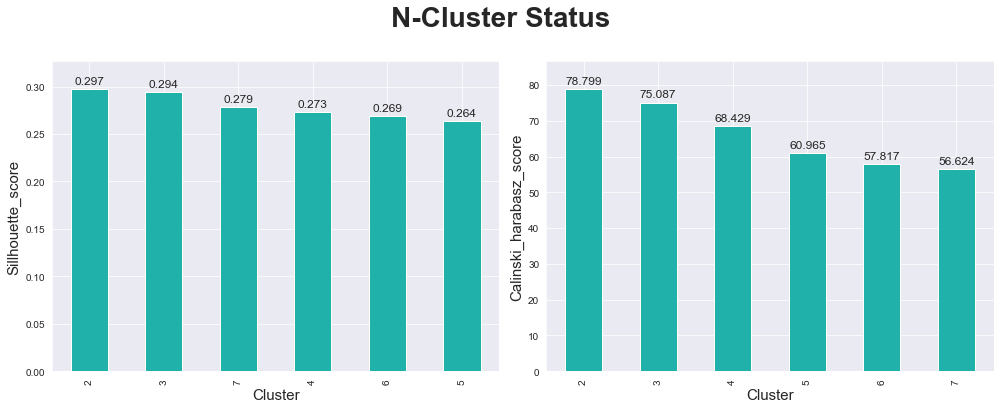

In [53]:
cluster_status(df_kmeans_score)

+ the __both metrics__ are refering to __2 clusters__


__Final algorithm hyperparameters :__

__Point__
   + Consequently, __calinski_harabasz_score__ is more reliable than __silhouette_score__, <br>
    I only check __calinski_harabasz_score__ for the final cluster decision

In [54]:
kmeans_info = df_kmeans_score.sort_values("calinski_harabasz_score").iloc[[-1], :-1]
kmeans_info

cluster  calinski_harabasz_score
0        2                78.799005

__Adding the final score to the comparison list :__

In [55]:
cluster_algorithm_comparison.append({"algorithm" : "Kmeans", "cluster" : kmeans_info.cluster.iloc[0], 
                            "calinski_harabasz_score" : kmeans_info.calinski_harabasz_score.iloc[0]})

__Clustering :__

In [56]:
Kmeans = KMeans(n_clusters = 2)
Kms_labels = Kmeans.fit_predict(df2_pca)

__Cluster Frequency :__

In [57]:
cluster_frequency(Kms_labels, "KMeans")

__Cluster centroids :__

In [58]:
kmeans_centroids = Kmeans.cluster_centers_

__PCA cluster result :__

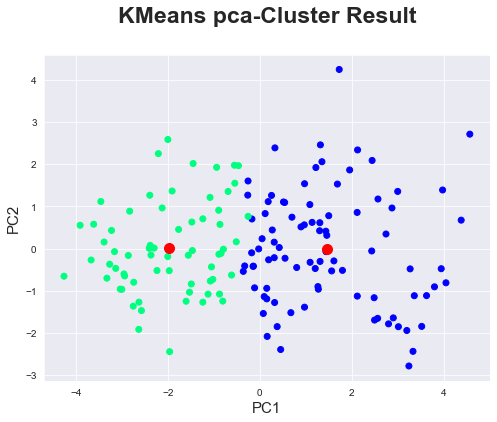

In [59]:
pca_cluster_result("KMeans", df2_pca, Kms_labels, kmeans_centroids)

+ the clusters are almost __circular in shape__

__Orginal feature cluster centroids :__

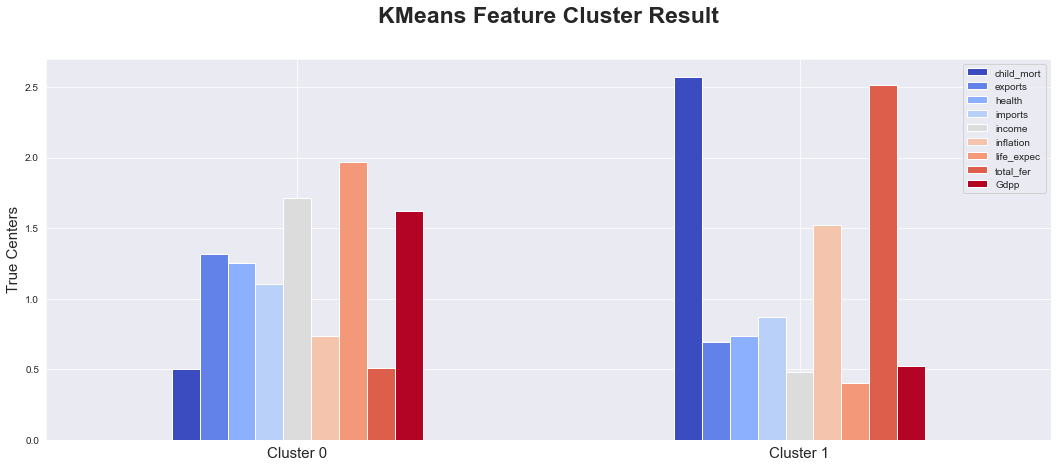

child_mort   exports    health   imports    income  inflation  \
Cluster 0    0.498261  1.314086  1.252680  1.107020  1.715678   0.733590   
Cluster 1    2.568009  0.690878  0.737122  0.871405  0.481515   1.521092   

           life_expec  total_fer      Gdpp  
Cluster 0    1.965413   0.506550  1.618971  
Cluster 1    0.400598   2.511287  0.520862

In [60]:
feature_cluster_result(pca_new, kmeans_centroids, cont_vars, "KMeans")

__The plot shows that :__
   - __Cluster 0__ : 
       + it is for __high-level countries, as a result of the features have <br> almost good normal same ranges__
       + the factors are so higher than __the cluster 1__
   - __Cluster 1__ : 
       + it is for __low-level countries__ , as a result of __the mean of child mort is high__ <br>
   and __the other features which are affective on a coutnry's economy is almost low__
       + If a country has a high level of child mortality and total fertility, <br>it generally indicates that the country is a low-level developing country but it depends on other <br> factors like cultural, economic, and political factors, as shown above the other factors are so lower <br>than the child-mort and total-fer and the the factors in __the cluster 0__
   

<a id = "GMM"></a>
## 10.3 | Gaussian Mixture Model

In [61]:
n_components = [2,3,4,5,6]
covariance_type = ["tied", "spherical"]

In [62]:
df_gmm_score = []
for p in product(n_components, covariance_type) :
    GMM = GaussianMixture(n_components = p[0], covariance_type = p[1], random_state = 0)
    GMM_labels = GMM.fit_predict(df2_pca)
    sill_score = silhouette_score(df2_pca, GMM_labels)
    calinski_score = calinski_harabasz_score(df2_pca, GMM_labels)
    df_gmm_score.append({"cluster" : p[0],"covariance_type" : p[1],"calinski_harabasz_score" : calinski_score,
                         "sillhouette_score"  : sill_score})
df_gmm_score = pd.DataFrame(df_gmm_score)

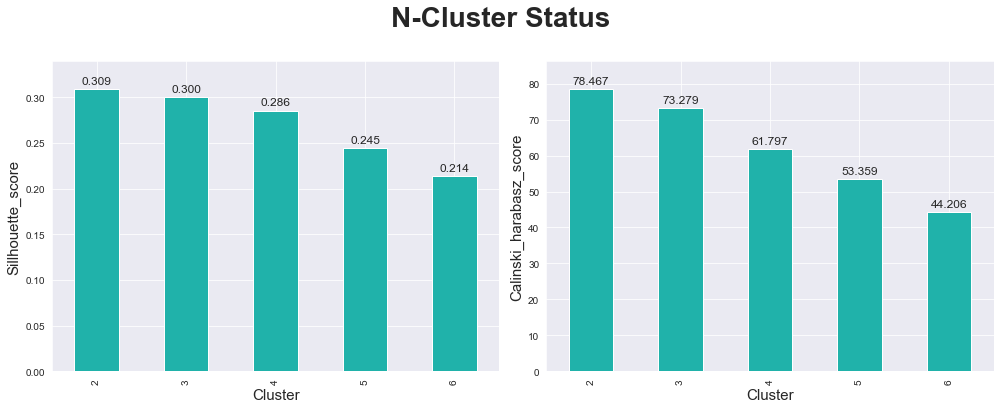

In [63]:
cluster_status(df_gmm_score)

+ the __both metrics__ are refering to __2 clusters__


__Final algorithm hyperparameters :__

In [64]:
gmm_info = df_gmm_score.sort_values("calinski_harabasz_score").iloc[[-1], :-1]
gmm_info

cluster covariance_type  calinski_harabasz_score
1        2       spherical                78.467405

In [65]:
cluster_algorithm_comparison.append({"algorithm" : "GMM", "cluster" : gmm_info.cluster.iloc[0], 
                            "calinski_harabasz_score" : gmm_info.calinski_harabasz_score.iloc[0]})

__Clustering :__

In [66]:
gmm = GaussianMixture(n_components = 2, covariance_type = "spherical", random_state = 0)
gmm_labels = gmm.fit_predict(df2_pca)

__Cluster frequency :__

In [67]:
cluster_frequency(gmm_labels, "GMM")

__Cluster centroids :__

In [68]:
gmm_centroids = gmm.means_
gmm_centroids

array([[ 1.38676968,  0.02588351, -0.06795503, -0.15768761,  0.01274822],
       [-1.915709  , -0.03575595,  0.09387432,  0.21783254, -0.01761063]])

__PCA cluster result :__

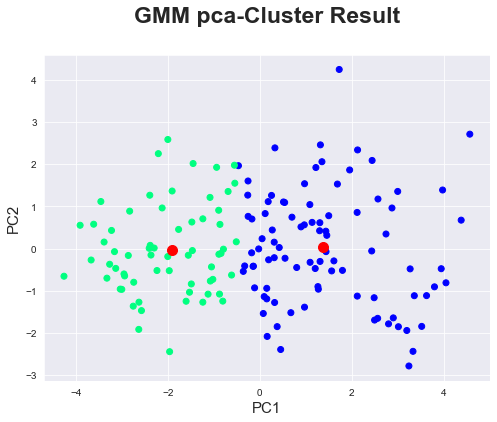

In [69]:
pca_cluster_result("GMM", df2_pca, gmm_labels,gmm_centroids)

__Orginal feature cluster centroids :__

__Points :__
   + Regarding the first line, pca_new.inverse_transform(centroids) performs an inverse transformation of the centroids using the principal components obtained from the pca_new object. This operation converts the data from the reduced PCA space back into the original feature space.<br>__However__, it is important to note that PCA can be used for dimensionality reduction and feature extraction, but it doesn't necessarily preserve the original scale or distribution of the data. Therefore, if the data being transformed was originally in the logarithmic scale, the transformed data might still remain in the logarithmic scale

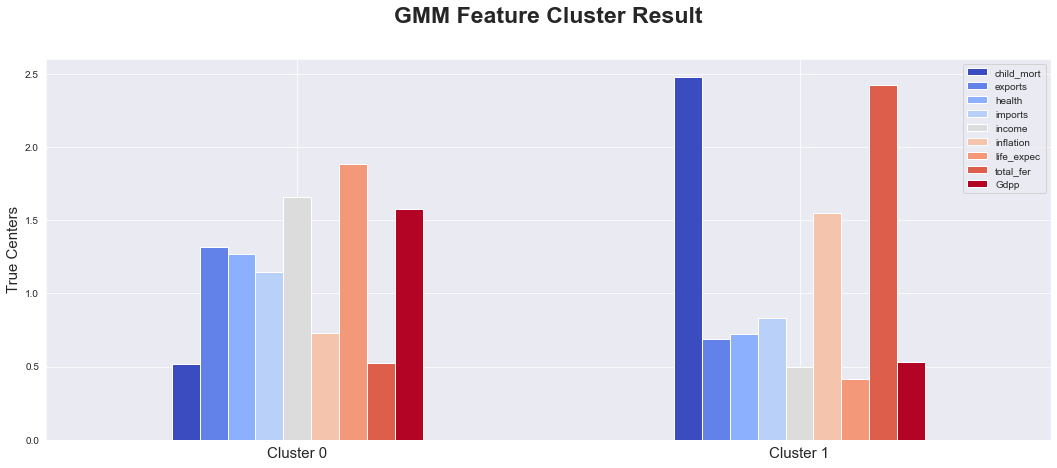

child_mort   exports    health   imports    income  inflation  \
Cluster 0    0.518864  1.313797  1.266391  1.142730  1.658642   0.727822   
Cluster 1    2.475311  0.685903  0.721624  0.831679  0.497084   1.550960   

           life_expec  total_fer      Gdpp  
Cluster 0    1.880794   0.526622  1.577277  
Cluster 1    0.417850   2.425083  0.532851

In [70]:
feature_cluster_result(pca_new, gmm_centroids, cont_vars, "GMM")

__The plot shows that :__
   - __Cluster 0__ : 
       + it is for __high-level countries, as a result of the features have <br> almost good normal same ranges__
       + the factors are so higher than __the cluster 1__
   - __Cluster 1__ : 
       + it is for __low-level countries__ , as a result of __the mean of child mort is high__ <br>
   and __the other features which are affective on a coutnry's economy is almost low__
       + If a country has a high level of child mortality and total fertility, <br>it generally indicates that the country is a low-level developing country but it depends on other <br> factors like cultural, economic, and political factors, as shown above the other factors are so lower <br>than the child-mort and total-fer and the the factors in __the cluster 0__
   

<a id = "minibatch"></a>
## 10.4 | MiniBatchKmeans

In [71]:
n_clusters = [2,3,4,5,6]
max_iter = [100, 300, 600]

In [72]:
df_mbk_score = []
for p in product(n_clusters, max_iter) :
    mbk = MiniBatchKMeans(n_clusters =  p[0], max_iter = p[1], random_state = 0)
    labels = mbk.fit_predict(df2_pca)
    sill_score = silhouette_score(df2_pca, labels)
    calinski_score = calinski_harabasz_score(df2_pca, labels)
    df_mbk_score.append({"cluster" : p[0],"max_iter" : p[1],"calinski_harabasz_score" : calinski_score,
                         "sillhouette_score"  : sill_score})
    
df_mbk_score = pd.DataFrame(df_mbk_score)

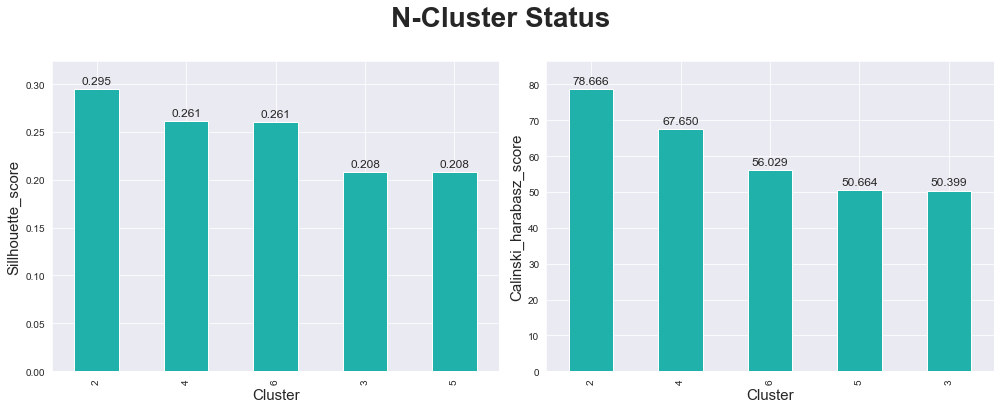

In [73]:
cluster_status(df_mbk_score)

+ the __both metrics__ are refering to __2 clusters__

__Final algorithm hyperparameters :__

In [74]:
minibatch_info = df_mbk_score.sort_values("calinski_harabasz_score").iloc[[-1], :-1]
minibatch_info

cluster  max_iter  calinski_harabasz_score
2        2       600                78.665928

In [75]:
cluster_algorithm_comparison.append({"algorithm" : "MiniBatch", "cluster" : minibatch_info.cluster.iloc[0], 
                            "calinski_harabasz_score" : minibatch_info.calinski_harabasz_score.iloc[0]})

__Clustering :__

In [76]:
minibatchkmeans = MiniBatchKMeans(n_clusters = 2, max_iter = 600)
mbk_labels = minibatchkmeans.fit_predict(df2_pca)

__Cluster frequency :__

In [77]:
cluster_frequency(mbk_labels, "MiniBatchKmeans")

__Cluster centroids :__

In [78]:
mbk_centroids = minibatchkmeans.cluster_centers_
mbk_centroids

array([[-2.25945482, -0.1490902 ,  0.19708601,  0.34394894, -0.11935061],
       [ 1.2481802 ,  0.03337167, -0.09135139, -0.18914577,  0.01545698]])

__PCA cluster result :__

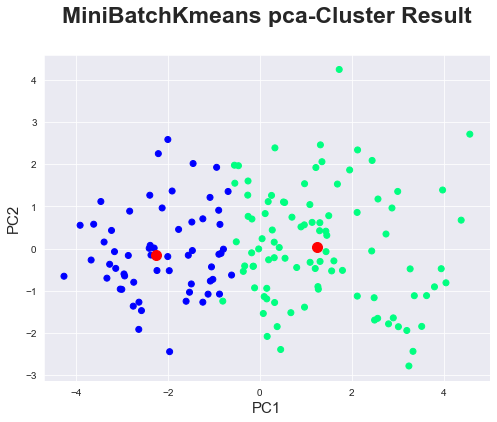

In [79]:
pca_cluster_result("MiniBatchKmeans", df2_pca, mbk_labels, mbk_centroids)

<a id = "spectral"></a>
## 10.5 | SpectralClustering

In [80]:
n_clusters_range = range(2, 6)
gamma_range = np.arange(0.1, 1, 0.1)

In [81]:
df_sc_score = []
for p in product(n_clusters_range, gamma_range):
    sc = SpectralClustering(n_clusters = p[0], gamma = p[1])
    labels = sc.fit_predict(df2_pca)
    sill_score = silhouette_score(df2_pca, labels)
    calinski_score = calinski_harabasz_score(df2_pca, labels)
    df_sc_score.append({"cluster" : p[0],"gamma" : p[1],"calinski_harabasz_score" : calinski_score,
                         "sillhouette_score"  : sill_score})
df_sc_score = pd.DataFrame(df_sc_score)

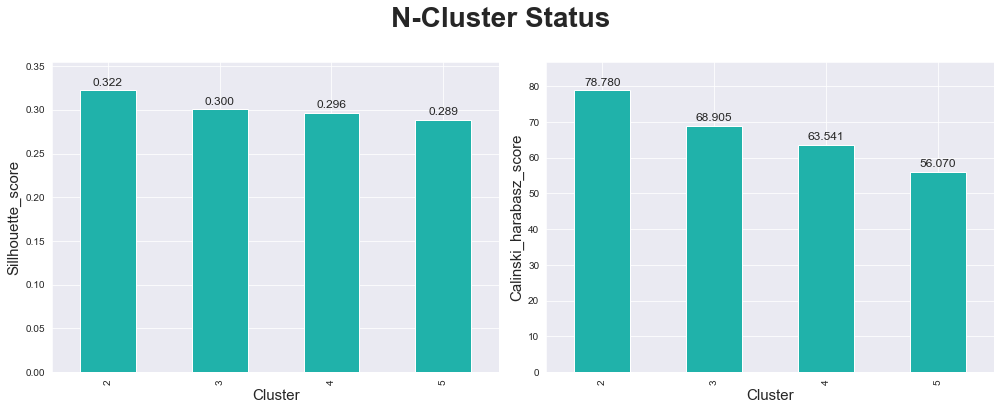

In [82]:
cluster_status(df_sc_score)

+ the __both metrics__ are refering to __2 clusters__

__Final algorithm hyperparameters :__

In [83]:
spect_info = df_sc_score.sort_values("calinski_harabasz_score").iloc[[-1], :-1]
spect_info

cluster  gamma  calinski_harabasz_score
0        2    0.1                78.779586

In [84]:
cluster_algorithm_comparison.append({"algorithm" : "Spectral", "cluster" : spect_info.cluster.iloc[0], 
                            "calinski_harabasz_score" : spect_info.calinski_harabasz_score.iloc[0]})

__Clustering :__

In [85]:
spectc = SpectralClustering(n_clusters = 2, gamma = 0.1)
sc_labels = spectc.fit_predict(df2_pca)

__Cluster frequncy :__

In [86]:
cluster_frequency(sc_labels, "SpectralClustering")

__PCA cluster result :__

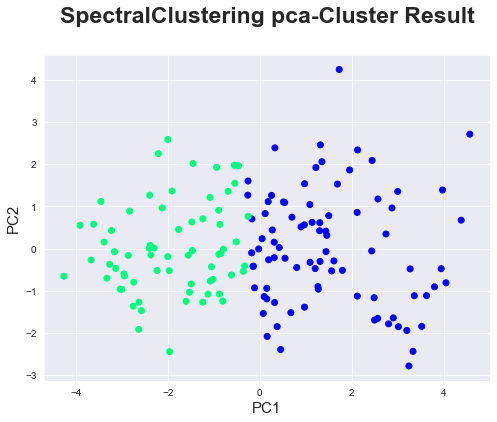

In [87]:
pca_cluster_result("SpectralClustering", df2_pca, sc_labels, centers = False)

<a id = "agglomerative"></a>
## 10.6 | Agglomerative

In [88]:
n_clusters = [2, 3, 4, 5]
linkage = ["ward", "complete", "average", "single"]

In [89]:
df_agglmv_score = []
for p in product(n_clusters, linkage) :
    agglmv = AgglomerativeClustering(n_clusters = p[0], linkage = p[1])
    labels = agglmv.fit_predict(df2_pca)
    sill_score = silhouette_score(df2_pca, labels)
    calinski_score = calinski_harabasz_score(df2_pca, labels)
    df_agglmv_score.append({"cluster" : p[0],"linkage" : p[1], "calinski_harabasz_score" : calinski_score,
                         "sillhouette_score"  : sill_score})
df_agglmv_score = pd.DataFrame(df_agglmv_score)

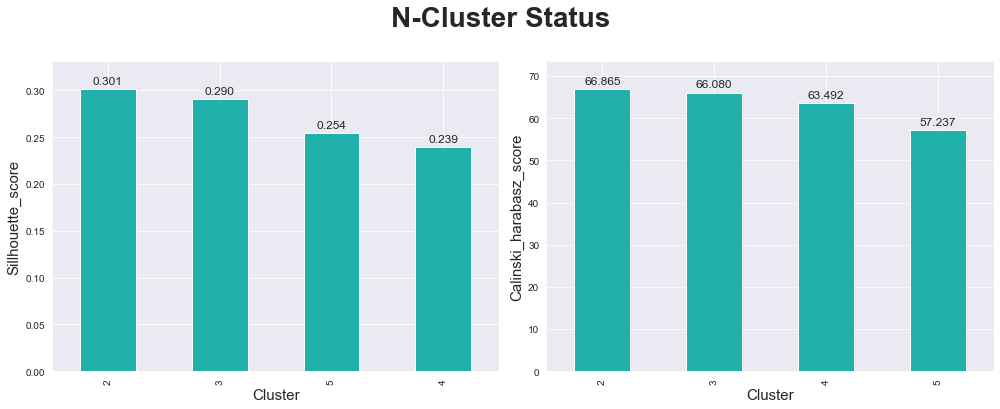

In [90]:
cluster_status(df_agglmv_score)

__Final algorithm hyperparameters :__

In [91]:
agglmv_info = df_agglmv_score.sort_values("calinski_harabasz_score").iloc[[-1], : -1]
agglmv_info

cluster   linkage  calinski_harabasz_score
1        2  complete                66.865186

In [92]:
cluster_algorithm_comparison.append({"algorithm" : "Agglomerative", "cluster" : agglmv_info.cluster.iloc[0], 
                            "calinski_harabasz_score" : agglmv_info.calinski_harabasz_score.iloc[0]})

__Clustering :__

In [93]:
agglomerative = AgglomerativeClustering(n_clusters = 2, linkage = "complete")
agglmv_labels = agglomerative.fit_predict(df2_pca)

__Cluster frequency :__

In [94]:
cluster_frequency(agglmv_labels, "Agglomerative")

__PCA cluster result :__

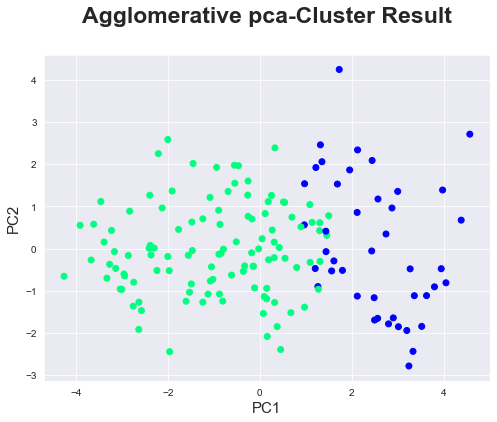

In [95]:
pca_cluster_result("Agglomerative", df2_pca, agglmv_labels, centers = False)

<a id = "algo_comaprison" ></a>
# <p style="background-color:#1a242e;font-family:newtimeroman;font-size:120%;color:#86B7E8;text-align:center;border-radius:10pX 15px;padding:7px;border:solid 3px #86B7E8;">11 | Algorithm Comparison</p>

In [96]:
cluster_algorithm_comparison_df = pd.DataFrame(cluster_algorithm_comparison).sort_values("calinski_harabasz_score")
cluster_algorithm_comparison_df

algorithm  cluster  calinski_harabasz_score
4  Agglomerative        2                66.865186
1            GMM        2                78.467405
2      MiniBatch        2                78.665928
3       Spectral        2                78.779586
0         Kmeans        2                78.799005

+ the above results shows that all the algorithm were used refer to 2 clusters
+ this data set is best clustered in 2 parts

__Algorithm comparison :__

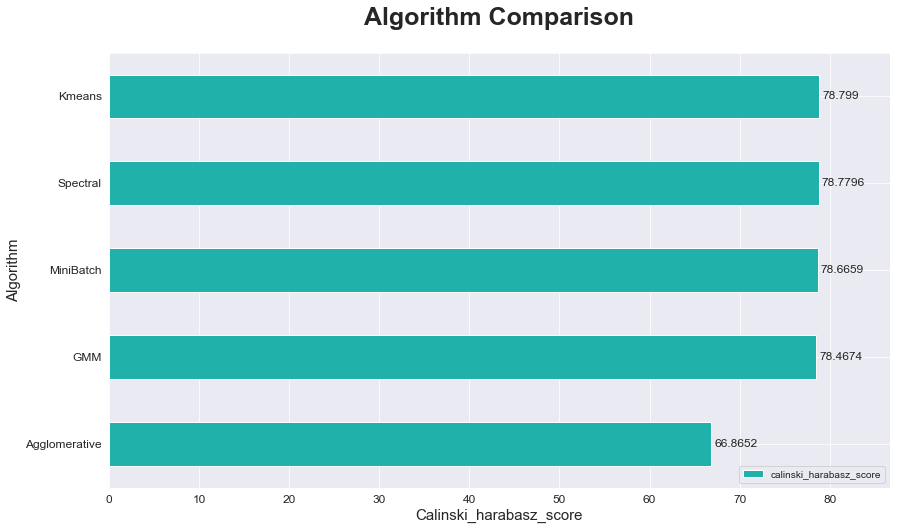

In [97]:
ax = cluster_algorithm_comparison_df.plot.barh(x = "algorithm", y = "calinski_harabasz_score",
                                              color = "lightseagreen", figsize = (14, 8), width = 0.5)
set_freq_label(ax, padding = 3, digitSize = 12)
plt.margins((0.1))
plt.ylabel("Algorithm", size = 15)
plt.xlabel("Calinski_harabasz_score", size = 15)
plt.title("Algorithm Comparison", size = 25, fontweight = "bold", y = 1.05)
plt.tick_params(labelsize = 12)
plt.grid()

+ this graph is __sorted__ in __ascending order__
+ the __standard-kmeans has the best score on 2 clusters__ <br>but generally it is almost the same as __( Spectral, MiniBatch, GMM )__ <br>that these __4 algorithms are qualified for this dataset__
+ the __agglomerative clustering algorithm__ is poorly clustered and has <br> lower score than other algorithms